In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 

import cv2
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers,utils
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.regularizers import L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'
val_dir = 'chest_xray/val'
# Define data generator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary',  # Use binary classification
    # Specify training subset
)

# Load and preprocess validation data
val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
      # Specify validation subset
)
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    
    
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
batch_images,batch_labels = train_generator.next()
#get class names 
class_names = list(train_generator.class_indices.keys())
class_names,batch_labels

(['NORMAL', 'PNEUMONIA'],
 array([0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.],
       dtype=float32))

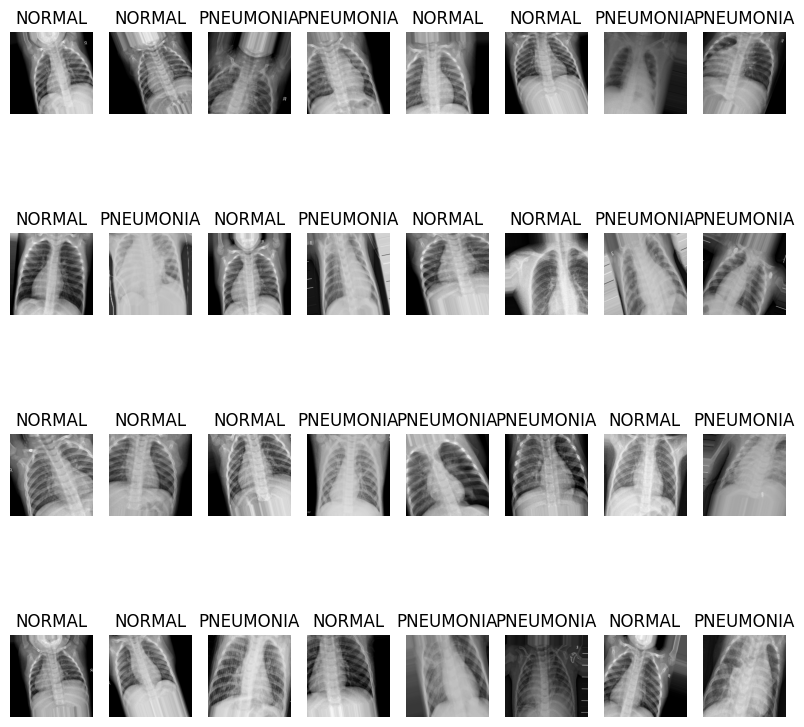

In [11]:
#plot images corresponding class names
plt.figure(figsize=(10,10))
for i in range(len(batch_images)):
    plt.subplot(4,8,i+1)
    plt.imshow(batch_images[i])
    plt.title(class_names[int(batch_labels[i])])
    plt.axis('off')
    
    
plt.show()




In [13]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])



In [18]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train Model
history = model.fit(train_generator, epochs=100, validation_data=val_generator,callbacks=[early_stopping])

# Evaluate Model
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/100
163/163 [==============================] - 296s 2s/step - loss: 0.2281 - accuracy: 0.8976 - val_loss: 0.9262 - val_accuracy: 0.6875
Epoch 2/100
163/163 [==============================] - 266s 2s/step - loss: 0.2237 - accuracy: 0.9018 - val_loss: 0.8515 - val_accuracy: 0.7500
Epoch 3/100
163/163 [==============================] - 378s 2s/step - loss: 0.2121 - accuracy: 0.9089 - val_loss: 1.3685 - val_accuracy: 0.5625
Epoch 4/100
163/163 [==============================] - 372s 2s/step - loss: 0.1938 - accuracy: 0.9210 - val_loss: 0.6459 - val_accuracy: 0.6875
Epoch 5/100
163/163 [==============================] - 276s 2s/step - loss: 0.1860 - accuracy: 0.9258 - val_loss: 0.5116 - val_accuracy: 0.8750
Epoch 6/100
163/163 [==============================] - 273s 2s/step - loss: 0.1721 - accuracy: 0.9304 - val_loss: 0.5127 - val_accuracy: 0.8750
Epoch 7/100
163/163 [==============================] - 282s 2s/step - loss: 0.1593 - accuracy: 0.9356 - val_loss: 0.2962 - val_accuracy: